In [1]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [37]:
X1=np.array([2.1,1.6,1.4,1.3,1.25,1.2,1.01,0.8])
Y1=np.array([10, 20, 30, 40, 50,  60, 100, 200])

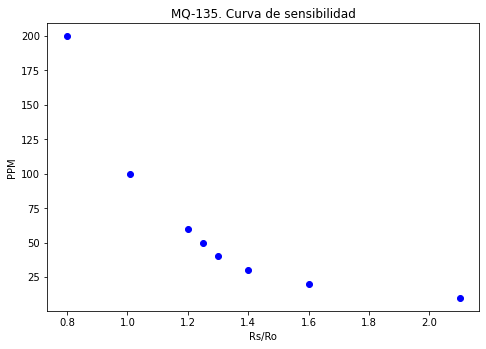

In [38]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(X1, Y1, color='b')
ax.set_xlabel('Rs/Ro')
ax.set_ylabel('PPM')
ax.set_title('MQ-135. Curva de sensibilidad')
plt.show()

In [3]:
X = X1[:,np.newaxis]
Y = Y1[:,np.newaxis]

In [4]:
poli_reg = PolynomialFeatures(degree = 2)

In [5]:
X_poli = poli_reg.fit_transform(X)
X_test_poli = poli_reg.fit_transform(Y)

In [6]:
pr = linear_model.LinearRegression()

In [7]:
pr.fit(X_poli, Y)

LinearRegression()

In [8]:
Y_pred_pr = pr.predict(X_poli)

In [9]:
pr.coef_

array([[   0.        , -695.59887533,  194.11300462]])

In [12]:
pr.intercept_

array([619.81657583])

Ecuación de segundo grado
y = 194.11x2 - 695.6x + 619.82

In [26]:
y = 194.11*X1**2 - 695.6*X1 + 619.82
y

array([ 15.0851  ,   3.7816  ,  26.4356  ,  43.5859  ,  53.616875,
        64.6184  , 115.275611, 187.5704  ])

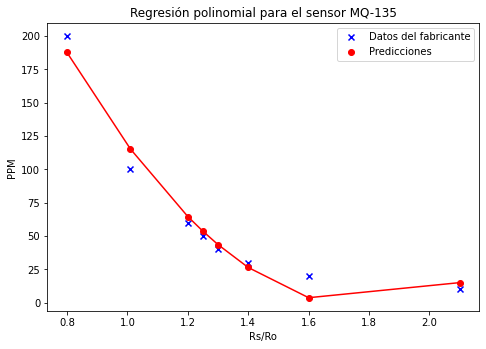

In [36]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(X1, Y1, color='b', marker='x', label='Datos del fabricante')
ax.scatter(X1, Y_pred_pr, color='r',label='Predicciones')
ax.set_xlabel('Rs/Ro')
ax.set_ylabel('PPM')
ax.set_title('Regresión polinomial para el sensor MQ-135')
ax.plot(X1,y,color = 'r')
plt.legend()
plt.show()

In [11]:
r2_score(Y1, Y_pred_pr)

0.9722911596401761